# Library

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import time

In [2]:
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

In [3]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

In [4]:
start_time = time.time()

# Fold

In [5]:
raw_fold = 'D:/data/multi_road/raw'
an_fold = 'D:/data/multi_road/analysis'
img_fold = 'D:/data/multi_road/img'

## xlsx to csv

In [6]:
# # 4m 39.4s
# name = '매연RSD_도로측정데이터_20221004~20230910'
# file_name = f'{name}.xlsx'
# rsd = pd.read_excel(os.path.join(raw_fold, file_name))
# rsd.info()

In [7]:
# # 12.6s
# rsd.to_csv(os.path.join(raw_fold, f'{name}.csv'), index=False)

# Load

## 원격측정정보

In [95]:
rsd_cdict = {
    'vdfDateTime':'검사날짜',
    'vdfTime':'검사시간',
    'vdfRecordStatus':'기록상태',
    'vdfValid':'유효',
    'samSpeed':'속도',
    'samAccel':'가속도',
    'samFlag':'플래그',
    'Smoke':'매연',
    'V_PLATE':'자동차등록번호',
    'LineNo':'차선번호'
}
len(rsd_cdict)

10

In [96]:
# 1s
name = '매연RSD_도로측정데이터_20221004~20230910'
file_name = f'{name}.csv'
rsd = pd.read_csv(os.path.join(raw_fold, file_name), usecols=rsd_cdict.keys())
rsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398673 entries, 0 to 398672
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   vdfDateTime      398673 non-null  object 
 1   vdfTime          398673 non-null  object 
 2   vdfRecordStatus  398673 non-null  object 
 3   vdfValid         398673 non-null  object 
 4   samSpeed         395272 non-null  float64
 5   samAccel         395272 non-null  float64
 6   samFlag          395272 non-null  object 
 7   Smoke            398673 non-null  float64
 8   V_PLATE          398673 non-null  object 
 9   LineNo           117903 non-null  float64
dtypes: float64(4), object(6)
memory usage: 30.4+ MB


In [97]:
rsdr = rsd.rename(columns=rsd_cdict)
rsdr.columns

Index(['검사날짜', '검사시간', '기록상태', '유효', '속도', '가속도', '플래그', '매연', '자동차등록번호',
       '차선번호'],
      dtype='object')

In [98]:
rsdr.head()

,검사날짜,검사시간,기록상태,유효,속도,가속도,플래그,매연,자동차등록번호,차선번호
0,10-04-2022,10:31:20,N,V,71.60,0.00,V,0.60,60저3406,NaN
1,10-04-2022,10:31:46,N,V,60.70,0.00,V,0.80,41구0483,NaN
2,10-04-2022,10:31:58,N,V,50.60,0.40,V,0.70,80러0579,NaN
3,10-04-2022,10:32:47,N,V,53.30,1.40,V,0.90,94누0128,NaN
4,10-04-2022,10:34:03,N,V,36.10,0.50,V,0.70,60수4386,NaN


### [출력] csv

In [17]:
# # 1s
# rsd.to_csv(os.path.join(raw_fold, f'{name}.csv'), index=False)

## 등록정보

In [64]:
car_cdict = {
    'VIN':'차대번호', 
    # 'BSPL_STDG_CD':'법정동코드', 
    'EXHST_GAS_GRD_CD':'배출가스등급', 
    'EXHST_GAS_CERT_NO':'배출가스인증번호',
    'VHCL_ERSR_YN':'차량말소YN',
    'MANP_MNG_NO':'제원관리번호', 
    'YRIDNW':'차량연식', 
    'VHCTY_CD':'차종', 
    # 'PURPS_CD2':'용도', 
    'FRST_REG_YMD':'최초등록일자',
    # 'VHCL_MNG_NO':'차량관리번호', 
    'VHRNO':'자동차등록번호',
    # 'VHCL_OWNR_CL_CD':'소유자구분', 
    'VHCL_FBCTN_YMD':'차량제작일자'
}
len(car_cdict)

10

In [65]:
# 2m 30s
name = 'STD_CEG_CAR_MIG(20230821)'
file_name = f'{name}.csv'
car = pd.read_csv(os.path.join(raw_fold, file_name), usecols=car_cdict.keys())
car.info()

C:\Users\kbjung\AppData\Local\Temp\ipykernel_3400\2069508936.py:4: DtypeWarning: Columns (8,18) have mixed types. Specify dtype option on import or set low_memory=False.
  car = pd.read_csv(os.path.join(raw_fold, file_name), usecols=car_cdict.keys())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30625663 entries, 0 to 30625662
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   EXHST_GAS_CERT_NO  object
 1   EXHST_GAS_GRD_CD   object
 2   FRST_REG_YMD       object
 3   MANP_MNG_NO        object
 4   VHCL_ERSR_YN       object
 5   VHCL_FBCTN_YMD     object
 6   YRIDNW             int64 
 7   VHCTY_CD           object
 8   VIN                object
 9   VHRNO              object
dtypes: int64(1), object(9)
memory usage: 2.3+ GB


In [66]:
# 4s
carr = car.rename(columns=car_cdict)
carr.columns

Index(['배출가스인증번호', '배출가스등급', '최초등록일자', '제원관리번호', '차량말소YN', '차량제작일자', '차량연식',
       '차종', '차대번호', '자동차등록번호'],
      dtype='object')

## 제원정보

In [67]:
src_cdict = {
    'MANP_MNG_NO':'제원관리번호', 
    'FUEL_CD':'연료',
    # 'VHCTY_CD':'차종', 
    'VHCTY_TY_CD2':'차종유형', 
    'MNFCTR_NM':'제작사명', 
    'VHCNM':'차명', 
    'VHCL_FRM':'자동차형식', 
    'EGIN_TY':'엔진형식', 
    'VHCTY_CL_CD':'차종분류',
    'TOTL_WGHT':'총중량',
    # 'CRYNG_WGHT':'적재중량',
    'DSPLVL':'배기량', 
    'EGIN_OTPT':'엔진출력', 
}
len(src_cdict)

11

In [68]:
# 2s
name = 'STD_CEG_CAR_SRC_MIG(20230821)'
file_name = f'{name}.csv'
src = pd.read_csv(os.path.join(raw_fold, file_name), usecols=src_cdict.keys())
src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566615 entries, 0 to 566614
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VHCL_FRM      536460 non-null  object 
 1   DSPLVL        530949 non-null  float64
 2   EGIN_OTPT     491335 non-null  float64
 3   EGIN_TY       517013 non-null  object 
 4   FUEL_CD       545937 non-null  object 
 5   MNFCTR_NM     559794 non-null  object 
 6   MANP_MNG_NO   566615 non-null  object 
 7   TOTL_WGHT     563088 non-null  float64
 8   VHCNM         566544 non-null  object 
 9   VHCTY_CL_CD   551140 non-null  object 
 10  VHCTY_TY_CD2  553038 non-null  object 
dtypes: float64(3), object(8)
memory usage: 47.6+ MB


In [69]:
srcr = src.rename(columns=src_cdict)
srcr.columns

Index(['자동차형식', '배기량', '엔진출력', '엔진형식', '연료', '제작사명', '제원관리번호', '총중량', '차명',
       '차종분류', '차종유형'],
      dtype='object')

## 정밀검사

In [168]:
eet_cdict = {
    'VIN':'차대번호', 
    # 'PRCINSP_JGMT':'검사판정', 
    'PREC_NLOD_SMO_MSTVL1':'무부하매연측정치1', # CO(매연)
    'PREC_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    'PREC_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    'PREC_NLOD_SMO_MSTVL2':'무부하매연측정치2', # HC(매연)
    'PREC_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    'PREC_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    'PREC_NLOD_SMO_MSTVL3':'무부하매연측정치3', # NOx(매연)
    'PREC_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    'PREC_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    # 'PRCINSP_KND_CD':'검사종류', 
    # 'PRCINSP_MSRMT_MTHD_CD':'검사방법', 
    'PRCINSP_YMD':'검사일자',
    # 'PRCINSP_DRVNG_DSTNC':'주행거리', 
}
len(eet_cdict)

11

In [169]:
# 2m
name = 'STD_TB_EET_HIS_ME(20230825)'
file_name = f'{name}.csv'
eet = pd.read_csv(os.path.join(raw_fold, file_name), usecols=eet_cdict.keys())
eet.info()

ValueError: Usecols do not match columns, columns expected but not found: ['PREC_NLOD_SMO_PRMVL2', 'PREC_NLOD_SMO_JT_YN3', 'PREC_NLOD_SMO_MSTVL2', 'PREC_NLOD_SMO_JT_YN2', 'PREC_NLOD_SMO_PRMVL3', 'PREC_NLOD_SMO_MSTVL3']

In [117]:
# 12s
eetr = eet.rename(columns=eet_cdict)
eetr.columns

Index(['차대번호', '무부하매연측정치3', '무부하매연판정3', '무부하매연허용치3', '검사일자'], dtype='object')

In [118]:
eetr['검사일자'].describe()

count   102191938.00
mean     20150152.16
std         55240.81
min      20020520.00
25%      20101023.00
50%      20151223.00
75%      20200718.00
max      20230731.00
Name: 검사일자, dtype: float64

# Preprocessing

## 원격측정정보

In [99]:
rsdr['차선번호'].value_counts(dropna=False)

NaN     280770
2.00     47427
1.00     38417
3.00     32059
Name: 차선번호, dtype: int64

In [100]:
rsdr[rsdr['차선번호'].isnull() == False].sort_values('검사날짜')

,검사날짜,검사시간,기록상태,유효,속도,가속도,플래그,매연,자동차등록번호,차선번호
279391,08-14-2023,08:35:46,N,V,0.00,0.00,x,0.00,********,1.00
282205,08-14-2023,19:57:49,N,V,68.04,-1.80,V,0.00,********,3.00
282206,08-14-2023,19:57:53,N,V,64.08,-1.80,V,0.00,********,3.00
282207,08-14-2023,19:57:59,N,V,77.76,-0.72,V,0.00,********,2.00
282208,08-14-2023,19:58:00,N,V,0.00,0.00,x,0.00,********,3.00
...,...,...,...,...,...,...,...,...,...,...
394859,09-10-2023,11:42:48,N,V,88.92,0.00,V,0.00,24가4429,3.00
394858,09-10-2023,11:42:47,N,V,93.24,-0.72,V,0.00,290나8536,2.00
394857,09-10-2023,11:42:43,N,V,80.64,-1.44,V,0.00,111노4375,2.00
394865,09-10-2023,11:43:11,N,V,99.00,1.08,V,0.00,03가6300,2.00


In [101]:
temp = rsdr.loc[rsdr['차선번호'].isnull() == False]
temp['검사날짜'] = pd.to_datetime(temp['검사날짜'], errors='coerce')

C:\Users\kbjung\AppData\Local\Temp\ipykernel_3400\2159847830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['검사날짜'] = pd.to_datetime(temp['검사날짜'], errors='coerce')


In [102]:
temp['검사날짜'].describe()

C:\Users\kbjung\AppData\Local\Temp\ipykernel_3400\1854553775.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  temp['검사날짜'].describe()


count                  117903
unique                     22
top       2023-08-31 00:00:00
freq                     8673
first     2023-08-14 00:00:00
last      2023-09-10 00:00:00
Name: 검사날짜, dtype: object

In [103]:
rsdr.columns

Index(['검사날짜', '검사시간', '기록상태', '유효', '속도', '가속도', '플래그', '매연', '자동차등록번호',
       '차선번호'],
      dtype='object')

In [104]:
rsdr['자동차등록번호'].head()

0    60저3406
1    41구0483
2    80러0579
3    94누0128
4    60수4386
Name: 자동차등록번호, dtype: object

In [105]:
rsdr.shape, len(rsdr['자동차등록번호'].unique())

((398673, 10), 145008)

In [106]:
rsdr['자동차등록번호'].isnull().sum()

0

In [107]:
rsdr[rsdr['자동차등록번호'] == '********'].shape

(128491, 10)

In [108]:
# N : 일반데이터, C : 교정 중 측정된자료, A : Audit데이터(표준필터 측정값)
rsdr['기록상태'].value_counts(dropna=False)

N    394679
A      2617
C      1377
Name: 기록상태, dtype: int64

In [109]:
# V : 일반데이터, x : 교정중
rsdr['유효'].value_counts(dropna=False)

V    397284
x      1389
Name: 유효, dtype: int64

In [110]:
# V : 일반데이터, x : 교정중
rsdr['플래그'].value_counts(dropna=False)

V      367634
x       27638
NaN      3401
Name: 플래그, dtype: int64

In [111]:
rsdr[['속도', '가속도', '매연']].describe()

,속도,가속도,매연
count,395272.00,395272.00,398673.00
mean,61.70,-0.49,1.22
std,25.31,3.66,6.34
min,0.00,-325.50,0.00
25%,54.36,-1.08,0.00
50%,64.44,-0.36,0.40
75%,74.52,0.00,0.90
max,2964.70,314.10,1024.20


In [112]:
rsdr.loc[rsdr['기록상태'] == 'N', '유효'].value_counts(dropna=False)

V    394542
x       137
Name: 유효, dtype: int64

In [113]:
rsdr.loc[rsdr['기록상태'] == 'N', '플래그'].value_counts(dropna=False)

V    367091
x     27588
Name: 플래그, dtype: int64

In [114]:
rsdr['매연'].describe()

count   398673.00
mean         1.22
std          6.34
min          0.00
25%          0.00
50%          0.40
75%          0.90
max       1024.20
Name: 매연, dtype: float64

### 검사날짜, 검사시간 전처리
- datetime type으로 변환
- 년월일 등 시간 단위로 나누기
- 요일 설정

In [119]:
rsdr[['검사날짜', '검사시간']].head()

,검사날짜,검사시간
0,10-04-2022,10:31:20
1,10-04-2022,10:31:46
2,10-04-2022,10:31:58
3,10-04-2022,10:32:47
4,10-04-2022,10:34:03


In [120]:
rsdr[['검사날짜', '검사시간']].isnull().sum()

검사날짜    0
검사시간    0
dtype: int64

In [121]:
rsdr[['검사날짜', '검사시간']].dtypes

검사날짜    object
검사시간    object
dtype: object

#### [issue] 검사시간 값 오류
- 자동차등록번호(V_PLATE) : 서울06도5872, 대전80바9861, 경기86소7588
- index : 266253, 266383, 266384, 269478

In [127]:
rsdr.loc[269478]

검사날짜       08-08-2023
검사시간        0.7753125
기록상태                N
유효                  V
속도              44.28
가속도             -0.36
플래그                 V
매연               0.00
자동차등록번호      ********
차선번호              NaN
검사날짜시간            NaT
Name: 269478, dtype: object

In [123]:
rsdr[(rsdr['자동차등록번호'] == '서울06도5872') | (rsdr['자동차등록번호'] == '대전80바9861') | (rsdr['자동차등록번호'] == '경기86소7588')]

,검사날짜,검사시간,기록상태,유효,속도,가속도,플래그,매연,자동차등록번호,차선번호
266253,08-08-2023,0.491134259,N,V,72.36,0.00,V,1.90,서울06도5872,NaN
266383,08-08-2023,0.499652778,N,V,50.40,-1.44,V,1.70,대전80바9861,NaN
266384,08-08-2023,0.499768519,N,V,72.72,1.88,V,0.00,경기86소7588,NaN
379009,09-07-2023,11:52:47,N,V,51.48,-0.36,V,0.50,대전80바9861,3.00


In [124]:
# 26.6s
rsdr['검사날짜시간'] = rsdr['검사날짜'] + ' ' + rsdr['검사시간']
rsdr['검사날짜시간']= pd.to_datetime(rsdr['검사날짜시간'], errors='coerce')
rsdr['검사날짜시간'].head()

0   2022-10-04 10:31:20
1   2022-10-04 10:31:46
2   2022-10-04 10:31:58
3   2022-10-04 10:32:47
4   2022-10-04 10:34:03
Name: 검사날짜시간, dtype: datetime64[ns]

In [125]:
rsdr['검사날짜시간'].isnull().sum()

4

In [126]:
rsdr.loc[rsdr['검사날짜시간'].isnull() == True].index

Int64Index([266253, 266383, 266384, 269478], dtype='int64')

In [128]:
rsdr['검사날짜시간_년'] = rsdr['검사날짜시간'].dt.year
rsdr['검사날짜시간_월'] = rsdr['검사날짜시간'].dt.month
rsdr['검사날짜시간_일'] = rsdr['검사날짜시간'].dt.day
rsdr['검사날짜시간_시'] = rsdr['검사날짜시간'].dt.hour
rsdr['검사날짜시간_분'] = rsdr['검사날짜시간'].dt.minute
rsdr['검사날짜시간_초'] = rsdr['검사날짜시간'].dt.second
rsdr['검사날짜시간_요일'] = rsdr['검사날짜시간'].dt.weekday.map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})

In [129]:
rsdr['검사날짜'] = pd.to_datetime(rsdr['검사날짜'])

In [130]:
rsdr.head()

,검사날짜,검사시간,기록상태,유효,속도,가속도,플래그,매연,자동차등록번호,차선번호,검사날짜시간,검사날짜시간_년,검사날짜시간_월,검사날짜시간_일,검사날짜시간_시,검사날짜시간_분,검사날짜시간_초,검사날짜시간_요일
0,2022-10-04,10:31:20,N,V,71.60,0.00,V,0.60,60저3406,NaN,2022-10-04 10:31:20,2022.00,10.00,4.00,10.00,31.00,20.00,화
1,2022-10-04,10:31:46,N,V,60.70,0.00,V,0.80,41구0483,NaN,2022-10-04 10:31:46,2022.00,10.00,4.00,10.00,31.00,46.00,화
2,2022-10-04,10:31:58,N,V,50.60,0.40,V,0.70,80러0579,NaN,2022-10-04 10:31:58,2022.00,10.00,4.00,10.00,31.00,58.00,화
3,2022-10-04,10:32:47,N,V,53.30,1.40,V,0.90,94누0128,NaN,2022-10-04 10:32:47,2022.00,10.00,4.00,10.00,32.00,47.00,화
4,2022-10-04,10:34:03,N,V,36.10,0.50,V,0.70,60수4386,NaN,2022-10-04 10:34:03,2022.00,10.00,4.00,10.00,34.00,3.00,화


In [131]:
rsdr['검사날짜시간_요일'].unique()

array(['화', '수', '목', '금', '월', '토', '일', nan], dtype=object)

## 등록정보

In [132]:
carr['차량말소YN'].value_counts(dropna=False)

N    25795579
Y     4830084
Name: 차량말소YN, dtype: int64

In [133]:
# 9s
# 말소 제거
carr = carr[carr['차량말소YN'] == 'N'].reset_index(drop=True)
carr.shape

(25795579, 10)

In [134]:
carr['최초등록일자'].dtype

dtype('O')

In [135]:
# 6s
# 최초등록일자 숫자형으로 변환
carr['최초등록일자'] = pd.to_numeric(carr['최초등록일자'], errors='coerce')

In [136]:
carr.shape

(25795579, 10)

In [137]:
carr['차량제작일자'].dtype

dtype('O')

In [138]:
carr['차량제작일자'].isnull().sum()

362730

In [139]:
# 3s
carr['차량제작일자'] = pd.to_numeric(carr['차량제작일자'], errors='coerce')
carr['차량제작일자'].isnull().sum()

362731

In [140]:
# 1m 12s
# 중복 차대번호 제거(최신 최초등록일자 남기기)
carr = carr.sort_values('최초등록일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
carr.shape

(25795319, 10)

In [141]:
# 11s
# 배출가스등급 코드 변환
grd_dict = {
    'A0501':'1', 
    'A0502':'2', 
    'A0503':'3', 
    'A0504':'4', 
    'A0505':'5', 
    'A05T2':'2',
    'A05T3':'3', 
    'A05T4':'4', 
    'A05T5':'5', 
    'A05X':'X', 
}
carr['배출가스등급'] = carr['배출가스등급'].replace(grd_dict)
carr['배출가스등급'].unique()

array(['2', '1', nan, '3', '5', '4'], dtype=object)

In [146]:
# 7s
# 차종 코드 변환
cd_dict = {
    'A31M':'이륜', 
    'A31P':'승용', 
    'A31S':'특수', 
    'A31T':'화물', 
    'A31V':'승합'
}
carr['차종'] = carr['차종'].replace(cd_dict)
carr['차종'].unique()

array(['승용', '화물', '특수', '승합'], dtype=object)

In [147]:
carr.columns

Index(['배출가스인증번호', '배출가스등급', '최초등록일자', '제원관리번호', '차량말소YN', '차량제작일자', '차량연식',
       '차종', '차대번호', '자동차등록번호'],
      dtype='object')

In [143]:
# ## 용도 코드 변환
# purps_dict = {
#     'A08P':'개인용', 
#     'A08B':'영업용', 
#     'A08O':'관용',
# }
# carr['용도'] = carr['용도'].replace(purps_dict)
# carr['용도'].unique()

In [144]:
# ## 소유자구분 코드 변환
# ownr_dict = {
#     'A27B':'사업자', 
#     'A27F':'외국인', 
#     'A27L':'법인', 
#     'A27O':'기타', 
#     'A27R':'주민', 
# }
# carr['소유자구분'] = carr['소유자구분'].replace(ownr_dict)
# carr['소유자구분'].unique()

## 제원정보

In [148]:
## 연료 코드 변환
fuel_dict = {
    'A90GS':'휘발유', 
    'A91DS':'경유',
    'A92LP':'LPG', 
    'A90GH':'휘발유_하이브리드', 
    'A93EV':'전기', 
    'A91DH':'경유_하이브리드', 
    'A92CN':'CNG', 
    'A93HD':'수소', 
    'A92LH':'LPG_하이브리드', 
    'A94OT':'기타연료', 
    'A92CH':'CNG_하이브리드',
    'A90AC':'알코올', 
    'A93SH':'태양열', 
    'A91KS':'등유', 
    'A92LN':'LNG', 
    'A90PH':'플러그인_하이브리드', 
}
srcr['연료'] = srcr['연료'].replace(fuel_dict)
srcr['연료'].unique()

array(['휘발유', '경유', '기타연료', 'LPG', nan, '휘발유_하이브리드', 'CNG', '등유', '태양열',
       '경유_하이브리드', '전기', '알코올', 'LPG_하이브리드', '수소', 'LNG', 'CNG_하이브리드'],
      dtype=object)

In [149]:
# # 7s
# # 차종 코드 변환
# cd_dict = {
#     'A31M':'이륜', 
#     'A31P':'승용', 
#     'A31S':'특수', 
#     'A31T':'화물', 
#     'A31V':'승합'
# }
# srcr['차종'] = srcr['차종'].replace(cd_dict)
# srcr['차종'].unique()

In [150]:
## 차종유형 코드 변환
ty_dict = {
    'A30C':'경형', 
    'A30L':'대형', 
    'A30M':'중형', 
    'A30S':'소형',
}
srcr['차종유형'] = srcr['차종유형'].replace(ty_dict)
srcr['차종유형'].unique()

array(['대형', '중형', '소형', '경형', nan], dtype=object)

## 정밀검사

In [151]:
eetr.shape

(102191938, 5)

In [152]:
# # 최근 검사만 활용
# # 4m 14.3s
# eetm = eetr.sort_values('검사일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
# eetm.shape

In [154]:
# ## 검사종류 코드 변환
# # 27.5s
# knd_dict = {
#     'A21P01':'정밀검사', 
#     'A1904':'정기검사', 
#     'A21T06':'종합검사(경과)', 
#     'A21T05':'종합검사', 
#     'A21S01':'특정검사', 
#     'A1902':'재검사(2부재검사)',
#     'A21R02':'2부재검사(종합)', 
#     'A21P02':'정밀검사(경과)', 
#     'A1903':'정기(경과)검사', 
#     'A21S04':'특정재검사(배출)', 
#     'A21E01':'배출재검사', 
#     'A21R01':'1부재검사(종합)',
#     'A21C02':'구조변경검사', 
#     'A21002':'관능재검사(임시)', 
#     'A21S03':'특정재검사(관능)', 
#     'A21S02':'특정검사(경과)', 
#     'A1901':'재검사(1부재검사)', 
#     'A21T02':'종합(정밀)',
#     'A21E02':'배출재검사(구변)', 
#     'A21T01':'종합(경과:정밀)', 
#     'A21T04':'종합(정밀) 2부재검사', 
#     'A21001':'관능재검사', 
#     'A21T03':'종합(정밀) 1부재검사', 
#     'A21TMP':'임시검사', 
# }
# eetr['검사종류'] = eetr['검사종류'].replace(knd_dict)
# eetr['검사종류'].unique()

In [155]:
# ## 검사방법 코드 변환
# # 14.9s
# mth_dict = {
#     'A18A':'무부하검사(TSI)', 
#     'A18B':'무부하검사(급가속)', 
#     'A18C':'무부하검사(정지가동)',
#     'A2301':'무부하검사(급가속)', 
#     'A2302':'무부하검사(정지가동)',
#     'A2303':'무부하검사(TSI)', 
#     'A2304':'부하검사(LUG DOWN)', 
#     'A2305':'부하검사(ASM-Idling)', 
#     'A2306':'부하검사(KD-147)', 
#     'A2307':'부하검사(ASM2525)', 
# }
# eetr['검사방법'] = eetr['검사방법'].replace(mth_dict)
# eetr['검사방법'].unique()

In [156]:
# 2.1s
eetr['검사일자'] = pd.to_datetime(eetr['검사일자'], format="%Y%m%d")

In [157]:
eetr['검사일자'].head()

0   2023-04-22
1   2023-04-22
2   2023-04-22
3   2023-04-22
4   2023-04-22
Name: 검사일자, dtype: datetime64[ns]

## 원격&등록

In [158]:
rsdr.shape

(398673, 18)

In [159]:
# 44s
rc = rsdr.merge(carr, on='자동차등록번호', how='left')
rc.shape

(398673, 27)

In [160]:
rc['차대번호'].isnull().sum()

140877

## 원격&등록&제원

In [163]:
rcs = rc.merge(srcr, on='제원관리번호', how='left')
rcs.shape

(398673, 37)

## 정밀(최신검사만)

In [164]:
eetr.shape

(102191938, 5)

In [165]:
eetr.columns

Index(['차대번호', '무부하매연측정치3', '무부하매연판정3', '무부하매연허용치3', '검사일자'], dtype='object')

In [ ]:
eetr = eetr.sort_values('검사일자')

## 원격&등록&제원&정밀

In [303]:
# 2m
rcse = rcs.merge(eetr, on='차대번호', how='left')
rcse.shape

(48043, 42)

### [출력] 원격&등록&제원&정밀

In [304]:
# 1s
file_name = f'원격_등록_제원_정밀({today_date}).csv'
rcse.to_csv(os.path.join(raw_fold, file_name), index=False)

## 유효데이터만 추출
- vdfRecordStatus = N
- vdfValid = V
- samFlag = V
- 자동차등록번호 : nan, 오류 값(********) 제외
- 매연 5% 초과 제외

In [ ]:
rcse = rcse[(rcse['기록상태'] == 'N') & (rcse['유효'] == 'V') & (rcse['플래그'] == 'V') & (rcse['자동차등록번호'] != '********') & (rcse['자동차등록번호'].isnull() == False) & (rcse['매연'] <= 5) & (rcse['매연'] >= 0)].reset_index(drop=True)
rcse.shape

(256778, 10)

In [ ]:
rsdr[['속도', '가속도', '매연']].describe()

,속도,가속도,매연
count,256778.00,256778.00,256778.00
mean,66.30,-0.50,0.80
std,14.93,1.05,1.52
min,1.00,-25.00,0.00
25%,56.88,-1.08,0.10
50%,66.24,-0.36,0.50
75%,75.96,0.00,0.90
max,119.88,25.00,29.80


# Load csv

## 원격&등록&제원

In [6]:
name = '원격_등록_제원(20230829)'
file_name = f'{name}.csv'
rcs = pd.read_csv(os.path.join(raw_fold, file_name))
rcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21757 entries, 0 to 21756
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   검사날짜       21757 non-null  object 
 1   검사시간       21757 non-null  object 
 2   기록상태       21757 non-null  object 
 3   유효         21757 non-null  object 
 4   속도         21757 non-null  float64
 5   가속도        21757 non-null  float64
 6   매연         21757 non-null  float64
 7   자동차등록번호    21757 non-null  object 
 8   검사날짜시간     21757 non-null  object 
 9   검사날짜시간_년   21757 non-null  int64  
 10  검사날짜시간_월   21757 non-null  int64  
 11  검사날짜시간_일   21757 non-null  int64  
 12  검사날짜시간_시   21757 non-null  int64  
 13  검사날짜시간_분   21757 non-null  int64  
 14  검사날짜시간_초   21757 non-null  int64  
 15  검사날짜시간_요일  21757 non-null  object 
 16  배출가스인증번호   19090 non-null  object 
 17  배출가스등급     20043 non-null  float64
 18  최초등록일자     20625 non-null  float64
 19  제원관리번호     20625 non-null  object 
 20  차량말소YN

## 원격&등록&제원&정밀

In [7]:
name = '원격_등록_제원_정밀(20230829)'
file_name = f'{name}.csv'
rcse = pd.read_csv(os.path.join(raw_fold, file_name))
rcse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48043 entries, 0 to 48042
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   검사날짜       48043 non-null  object 
 1   검사시간       48043 non-null  object 
 2   기록상태       48043 non-null  object 
 3   유효         48043 non-null  object 
 4   속도         48043 non-null  float64
 5   가속도        48043 non-null  float64
 6   매연         48043 non-null  float64
 7   자동차등록번호    48043 non-null  object 
 8   검사날짜시간     48043 non-null  object 
 9   검사날짜시간_년   48043 non-null  int64  
 10  검사날짜시간_월   48043 non-null  int64  
 11  검사날짜시간_일   48043 non-null  int64  
 12  검사날짜시간_시   48043 non-null  int64  
 13  검사날짜시간_분   48043 non-null  int64  
 14  검사날짜시간_초   48043 non-null  int64  
 15  검사날짜시간_요일  48043 non-null  object 
 16  배출가스인증번호   44137 non-null  object 
 17  배출가스등급     46328 non-null  float64
 18  최초등록일자     46911 non-null  float64
 19  제원관리번호     46911 non-null  object 
 20  차량말소YN

# Analysis

## 1\. 일자별 측정건수
- 시험날짜별 경유차 측정 건수, 비율

In [8]:
rcs.shape, len(rcs['자동차등록번호'].unique())

((21757, 35), 18129)

In [9]:
rcs['연료'].isnull().sum()

1144

In [10]:
temp = rcs.groupby(['검사날짜', '연료'], dropna=False)['자동차등록번호'].count().reset_index()
temp

,검사날짜,연료,자동차등록번호
0,2022-10-04,CNG(압축천연가스),2
1,2022-10-04,LPG(액화석유가스),9
2,2022-10-04,경유,53
3,2022-10-04,전기,2
4,2022-10-04,휘발유,53
...,...,...,...
370,2023-03-30,경유 하이브리드,3
371,2023-03-30,전기,10
372,2023-03-30,휘발유,341
373,2023-03-30,휘발유 하이브리드,45


In [11]:
temp['자동차등록번호'].sum()

21757

In [12]:
grp1 = rcs.groupby(['검사날짜', '연료'], dropna=False)['자동차등록번호'].count().unstack('연료').reset_index()
grp1 = grp1.fillna(0)
grp1['합계'] = grp1.iloc[:, 1:].sum(axis=1)
grp1['경유_비율'] = grp1['경유'] / grp1['합계']
grp1['경유_하이브리드_비율'] = grp1['경유 하이브리드'] / grp1['합계']
grp1

연료,검사날짜,CNG(압축천연가스),LPG 하이브리드,LPG(액화석유가스),경유,경유 하이브리드,기타연료,수소,전기,휘발유,휘발유 하이브리드,NaN,합계,경유_비율,경유_하이브리드_비율
0,2022-10-04,2.00,0.00,9.00,53.00,0.00,0.00,0.00,2.00,53.00,6.00,7.00,132.00,0.40,0.00
1,2022-10-05,3.00,1.00,7.00,47.00,0.00,1.00,0.00,2.00,29.00,1.00,3.00,94.00,0.50,0.00
2,2022-10-06,2.00,0.00,6.00,51.00,0.00,0.00,0.00,0.00,30.00,2.00,6.00,97.00,0.53,0.00
3,2022-10-07,2.00,0.00,10.00,47.00,1.00,0.00,0.00,2.00,37.00,5.00,9.00,113.00,0.42,0.01
4,2022-10-11,1.00,0.00,4.00,29.00,0.00,0.00,0.00,0.00,23.00,1.00,3.00,61.00,0.48,0.00
5,2022-10-12,1.00,0.00,4.00,39.00,0.00,0.00,0.00,2.00,22.00,6.00,4.00,78.00,0.50,0.00
6,2022-10-13,2.00,0.00,4.00,61.00,0.00,0.00,0.00,4.00,43.00,6.00,4.00,124.00,0.49,0.00
7,2022-10-14,1.00,0.00,11.00,74.00,1.00,0.00,1.00,2.00,52.00,8.00,0.00,150.00,0.49,0.01
8,2022-10-17,2.00,0.00,9.00,73.00,1.00,0.00,0.00,2.00,61.00,8.00,9.00,165.00,0.44,0.01
9,2022-10-18,2.00,0.00,12.00,62.00,0.00,0.00,0.00,4.00,35.00,8.00,9.00,132.00,0.47,0.00


In [13]:
grp1['합계'].sum()

21757.0

In [14]:
# grp1 = rcs.groupby(['검사날짜', '연료'], dropna=False)['자동차등록번호'].count().reset_index()
# grp1['합계'] = grp1.groupby(['검사날짜'], dropna=False)['자동차등록번호'].transform('sum')
# grp1['비율'] = grp1['자동차등록번호'] / grp1['합계']
# grp1 = grp1.rename(columns={'자동차등록번호':'원격측정건수'})
# grp1

In [15]:
# grp1['원격측정건수'].sum()

## 2\. 시간대별 측정건수
- 시간대별 경유차 측정 건수, 비율

In [16]:
grp2 = rcs.groupby(['검사날짜시간_시', '연료'], dropna=False)['자동차등록번호'].count().unstack('연료').reset_index()
grp2 = grp2.fillna(0)
grp2['합계'] = grp2.iloc[:, 1:].sum(axis=1)
grp2['경유_비율'] = grp2['경유'] / grp2['합계']
grp2['경유_하이브리드_비율'] = grp2['경유 하이브리드'] / grp2['합계']
grp2

연료,검사날짜시간_시,CNG(압축천연가스),LPG 하이브리드,LPG(액화석유가스),경유,경유 하이브리드,기타연료,수소,전기,휘발유,휘발유 하이브리드,NaN,합계,경유_비율,경유_하이브리드_비율
0,8,1.00,0.00,0.00,9.00,0.00,0.00,0.00,1.00,4.00,0.00,0.00,15.00,0.60,0.00
1,9,10.00,3.00,587.00,2677.00,12.00,4.00,5.00,151.00,2248.00,314.00,360.00,6371.00,0.42,0.00
2,10,16.00,6.00,993.00,4483.00,23.00,11.00,15.00,210.00,3922.00,605.00,603.00,10887.00,0.41,0.00
3,11,6.00,2.00,220.00,959.00,6.00,1.00,5.00,49.00,872.00,131.00,112.00,2363.00,0.41,0.00
4,12,0.00,0.00,45.00,198.00,1.00,1.00,2.00,12.00,168.00,36.00,16.00,479.00,0.41,0.00
5,13,0.00,0.00,68.00,373.00,3.00,0.00,0.00,9.00,264.00,41.00,29.00,787.00,0.47,0.00
6,14,0.00,0.00,2.00,17.00,0.00,0.00,0.00,0.00,19.00,3.00,0.00,41.00,0.41,0.00
7,15,0.00,0.00,70.00,321.00,3.00,0.00,0.00,10.00,341.00,45.00,24.00,814.00,0.39,0.00


In [17]:
grp2['합계'].sum()

21757.0

In [18]:
# grp2 = rcs.groupby(['검사날짜시간_시', '연료'], dropna=False)['자동차등록번호'].count().reset_index()
# grp2['합계'] = grp2.groupby(['검사날짜시간_시'], dropna=False)['자동차등록번호'].transform('sum')
# grp2['비율'] = grp2['자동차등록번호'] / grp2['합계']
# grp2 = grp2.rename(columns={'자동차등록번호':'원격측정건수'})
# grp2

In [19]:
# grp2['원격측정건수'].sum()

## 3\. 요일별 측정건수
- 요일별 경유차 측정 건수, 비율

In [20]:
grp3 = rcs.groupby(['검사날짜시간_요일', '연료'], dropna=False)['자동차등록번호'].count().unstack('연료').reset_index()
grp3 = grp3.fillna(0)
grp3['합계'] = grp3.iloc[:, 1:].sum(axis=1)
grp3['경유_비율'] = grp3['경유'] / grp3['합계']
grp3['경유_하이브리드_비율'] = grp3['경유 하이브리드'] / grp3['합계']
grp3

연료,검사날짜시간_요일,CNG(압축천연가스),LPG 하이브리드,LPG(액화석유가스),경유,경유 하이브리드,기타연료,수소,전기,휘발유,휘발유 하이브리드,NaN,합계,경유_비율,경유_하이브리드_비율
0,금,3,1,95,423,3,1,2,22,364,61,39,1014,0.42,0.00
1,목,7,2,552,2669,12,5,5,125,2343,338,367,6425,0.42,0.00
2,수,9,1,330,1413,5,4,6,65,1281,199,222,3535,0.40,0.00
3,월,7,4,487,2070,14,3,8,127,1763,261,236,4980,0.42,0.00
4,화,7,3,521,2462,14,4,6,103,2087,316,280,5803,0.42,0.00


In [21]:
grp3['합계'].sum()

21757

In [22]:
# grp3 = rcs.groupby(['검사날짜시간_요일', '연료'], dropna=False)['자동차등록번호'].count().reset_index()
# grp3['합계'] = grp3.groupby(['검사날짜시간_요일'], dropna=False)['자동차등록번호'].transform('sum')
# grp3['비율'] = grp3['자동차등록번호'] / grp3['합계']
# grp3 = grp3.rename(columns={'자동차등록번호':'원격측정건수'})
# grp3

In [23]:
# grp3['원격측정건수'].sum()

## [🔺] 4\. 차선별 측정건수(데이터 부재)

## 5\. 차종별 측정건수
- 차종별 측정 건수, 비율

In [24]:
grp5 = rcs.groupby(['차종'], dropna=False)['자동차등록번호'].count().reset_index()
grp5['비율'] = grp5['자동차등록번호'] / grp5['자동차등록번호'].sum()
grp5 = grp5.rename(columns={'자동차등록번호':'원격측정건수'})
grp5

,차종,원격측정건수,비율
0,승용,15641,0.72
1,승합,726,0.03
2,특수,60,0.00
3,화물,4198,0.19
4,NaN,1132,0.05


In [25]:
grp5['원격측정건수'].sum()

21757

## [❗] 경유차만 추출

In [26]:
die = rcs.loc[rcs['연료'] == '경유'].reset_index(drop=True)
die.shape

(9037, 35)

In [27]:
len(die['자동차등록번호'].unique())

7425

In [28]:
diee = rcse.loc[rcse['연료'] == '경유'].reset_index(drop=True)
diee.shape

(24124, 42)

In [29]:
len(diee['자동차등록번호'].unique())

7425

## 6\. 매연측정 통계
- 매연 값 전체의 통계(최대, 최소, 중간, 평균)

In [30]:
# # 경유차만 통계
grp6 = die['매연'].describe().reset_index()
grp6

,index,매연
0,count,9037.00
1,mean,1.68
2,std,3.39
3,min,0.00
4,25%,0.40
5,50%,0.60
6,75%,1.00
7,max,19.90


## [🔺] 7\. 차선별 매연측정 통계(데이터 부재)
- 차선별 매연 값 전체의 통계

## 8\. 속도별 매연측정 통계
- 속도별 매연 값 전체의 통계

In [31]:
die['속도'].describe()

count   9037.00
mean      47.07
std       35.33
min        0.00
25%       42.20
50%       49.70
75%       55.70
max     1699.30
Name: 속도, dtype: float64

In [32]:
# 10단위로 나눔
# 100초과는 하나의 구간으로 설정
per = 10
for i in range(10):
    die.loc[(die['속도'] >= i * per) & (die['속도'] < (i + 1) * per), '속도구간'] = f'{i * per}이상 {(i + 1) * per}미만'
die.loc[die['속도'] >= 100, '속도구간'] = '100이상'

In [33]:
grp8 = die.groupby('속도구간').agg({'매연':['max', 'min', lambda x:x.describe()['50%'], 'mean'], '자동차등록번호':'count'}).reset_index()
# grp8 = grp8.rename(columns={'max':'매연_max', 'min':'매연_min', '<lambda_0>':'매연_Q2', 'mean':'매연_mean', '자동차등록번호':'원격검사건수'})
grp8.columns = ['속도구간', '매연_max', '매연_min', '매연_Q2', '매연_mean', '원격검사건수']
grp8

,속도구간,매연_max,매연_min,매연_Q2,매연_mean,원격검사건수
0,0이상 10미만,19.90,0.00,0.50,1.09,748
1,100이상,3.60,0.00,0.60,0.89,21
2,10이상 20미만,19.10,0.00,0.65,1.73,74
3,20이상 30미만,19.30,0.00,0.60,2.14,188
4,30이상 40미만,19.80,0.00,0.60,2.09,822
5,40이상 50미만,19.90,0.00,0.60,1.83,2808
6,50이상 60미만,19.90,0.00,0.60,1.61,3215
7,60이상 70미만,19.90,0.00,0.60,1.48,982
8,70이상 80미만,19.80,0.10,0.85,1.98,160
9,80이상 90미만,10.30,0.30,0.75,1.78,18


In [34]:
grp8['원격검사건수'].sum()

9037

## 9\. 매연농도별 측정건수, 건수 비율
- 1. 매연농도 구간별 측정건수 개수
- 2. 전체 측정개수 중 해당구간 개수 비율

In [35]:
# 5단위로 분리
per = 5
for i in range(4):
    die.loc[(die['매연'] >= i * per) & (die['매연'] < (i + 1) * per), '매연구간'] = f'{i * per}이상 {(i + 1) * per}미만'

In [36]:
grp9 = die.groupby('매연구간')['자동차등록번호'].count().reset_index()
grp9['비율'] = grp9['자동차등록번호'] / grp9['자동차등록번호'].sum()
grp9 = grp9.rename(columns={'자동차등록번호':'원격측정건수'})
grp9

,매연구간,원격측정건수,비율
0,0이상 5미만,8237,0.91
1,10이상 15미만,216,0.02
2,15이상 20미만,225,0.02
3,5이상 10미만,359,0.04


In [37]:
grp9['원격측정건수'].sum()

9037

## ~~[❌]10\. 차선별 매연측정 통계(7번과 동일)~~
- ~~차선별 매연 값 통계~~ 

## ~~[❌] 11\. 속도별 매연측정 통계(8번과 동일)~~
- ~~속도범위별 매연 값 평균~~

## 12\. 매연농도 상위 10%의 정밀검사 결과
- 매연 상위 10%의 정밀검사 결과(무부하측정치1) 확인
    - 정밀검사 최신결과? YES
- 검사결과의 적합/부적합 여부(비율)
    - 정밀검사 최신결과? YES

- 과정
    - 1\. 정밀 '검사일자' 최신, '자동차등록번호' 기준 중복 제거
    - 2\. '매연' 기준으로 내림차순
    - 3\. 전체의 10%만 추출
    - 4\. '검사판정' == 'Y', 'N' 비율 분석 

In [38]:
diee.shape

(24124, 42)

In [39]:
# 1\. 정밀 '검사일자' 최신, '자동차등록번호' 기준 중복 제거
sdf12 = diee.sort_values('검사일자', ascending=False).drop_duplicates('자동차등록번호').reset_index(drop=True)
sdf12.shape

(7425, 42)

In [40]:
# 2\. '매연' 기준으로 내림차순
sdf12 = sdf12.sort_values('매연', ascending=False).reset_index(drop=True)
sdf12.shape

(7425, 42)

In [41]:
rate = round(0.1 * sdf12.shape[0])
rate

742

In [42]:
# 3\. 전제의 10%만 추출
sdf12 = sdf12.iloc[:rate]
sdf12.shape

(742, 42)

In [43]:
# # 4\. '검사판정' == 'Y', 'N' 비율 분석 
# grp12 = sdf12['검사판정'].value_counts(normalize=True).reset_index()
# grp12 = grp12.rename(columns={'proportion':'비율'})
# grp12

In [44]:
# 4\. '검사판정' == 'Y', 'N' 비율 분석 
grp12 = sdf12.groupby(['검사판정'], dropna=False)['자동차등록번호'].count().reset_index()
grp12['비율'] = grp12['자동차등록번호'] / grp12['자동차등록번호'].sum()
grp12 = grp12.rename(columns={'자동차등록번호':'원격검사건수'})
grp12

,검사판정,원격검사건수,비율
0,N,9,0.01
1,Y,517,0.70
2,NaN,216,0.29


In [45]:
grp12['원격검사건수'].sum()

742

## [❌] 13\. 시험일 후 최초검사 부적합 - 원격 매연 값 
- 1. 시험날짜 이후 최초 정밀검사 결과가 부적합인 차량 추출
- 2. 원격 매연 값 확인하여 정밀검사의 판정이 적절한지 판정
- 오류-적합율 : 매연RSD 에서 과다측정된 차량이 검사결과에서 부적합 판정을 받은 경우의 수치
    - 과다측정 : 차종별 정기 검사 기준에서 벗어난 매연 값

- 과정
    - 1. 검사판정 == 'N'인 샘플 추출
    - 2. 검사일자(정밀검사) - 검사날짜(원격측정) = 검사날짜차이
    - 3. '검사날짜차이' > 0 인 샘플 추출
    - 4. '검사날짜차이' 오름차순, '자동차등록번호' 기준 중복 제거
    - 5. 제작일자, 차종별 정기 검사 매연 허용치 정보 추가
    - 6. 매연 허용치 이상 차량만 추출 (해당되는 차량 없음)
    - 7. 정밀검사 '검사판정' == N 인 비율

In [46]:
# 1. 검사판정 == 'N'인 샘플 추출
sdf13 = diee[diee['검사판정'] == 'N'].reset_index(drop=True)
sdf13.shape

(1661, 42)

In [47]:
sdf13[['검사날짜', '검사일자']].dtypes

검사날짜    object
검사일자    object
dtype: object

In [48]:
sdf13.head()

,검사날짜,검사시간,기록상태,유효,속도,가속도,매연,자동차등록번호,검사날짜시간,검사날짜시간_년,...,차명,차종분류,차종유형,검사판정,무부하매연측정치1,무부하매연판정1,무부하매연허용치1,검사방법,검사종류,검사일자
0,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,포터Ⅱ(PORTERⅡ),A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2016-03-08
1,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,포터Ⅱ(PORTERⅡ),A2809,소형,N,50.00,N,15.00,부하검사(KD-147),종합검사,2017-03-15
2,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,포터Ⅱ(PORTERⅡ),A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2022-04-05
3,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,포터Ⅱ(PORTERⅡ),A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2020-03-20
4,2022-10-04,11:14:10,N,V,65.80,0.00,0.80,80주7009,2022-10-04 11:14:10,2022,...,액티언스포츠,A2810,소형,N,36.00,N,15.00,부하검사(KD-147),종합검사,2015-07-27


In [49]:
sdf13['검사날짜'] = pd.to_datetime(sdf13['검사날짜'])
sdf13['검사일자'] = pd.to_datetime(sdf13['검사일자'])

In [50]:
sdf13[['검사날짜', '검사일자']].dtypes

검사날짜    datetime64[ns]
검사일자    datetime64[ns]
dtype: object

In [51]:
# 2. 검사일자(정밀검사) - 검사날짜(원격측정) = 검사날짜차이
sdf13['검사날짜차이'] = sdf13['검사일자'] - sdf13['검사날짜']

In [52]:
sdf13.head()

,검사날짜,검사시간,기록상태,유효,속도,가속도,매연,자동차등록번호,검사날짜시간,검사날짜시간_년,...,차종분류,차종유형,검사판정,무부하매연측정치1,무부하매연판정1,무부하매연허용치1,검사방법,검사종류,검사일자,검사날짜차이
0,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2016-03-08,-2401 days
1,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,A2809,소형,N,50.00,N,15.00,부하검사(KD-147),종합검사,2017-03-15,-2029 days
2,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2022-04-05,-182 days
3,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2020-03-20,-928 days
4,2022-10-04,11:14:10,N,V,65.80,0.00,0.80,80주7009,2022-10-04 11:14:10,2022,...,A2810,소형,N,36.00,N,15.00,부하검사(KD-147),종합검사,2015-07-27,-2626 days


In [53]:
sdf13['검사날짜차이'] = sdf13['검사날짜차이'].astype('str')
sdf13['검사날짜차이'] = sdf13['검사날짜차이'].str.split(' ').str[0]
sdf13['검사날짜차이'] = pd.to_numeric(sdf13['검사날짜차이'], errors='coerce')

In [54]:
# 3. '검사날짜차이' > 0 인 샘플 추출
sdf13 = sdf13[sdf13['검사날짜차이'] > 0].reset_index(drop=True)
sdf13.shape

(174, 43)

In [55]:
# 4. '검사날짜차이' 오름차순, '자동차등록번호' 기준 중복 제거
sdf13 = sdf13.sort_values('검사날짜차이').drop_duplicates('자동차등록번호').reset_index(drop=True)
sdf13

,검사날짜,검사시간,기록상태,유효,속도,가속도,매연,자동차등록번호,검사날짜시간,검사날짜시간_년,...,차종분류,차종유형,검사판정,무부하매연측정치1,무부하매연판정1,무부하매연허용치1,검사방법,검사종류,검사일자,검사날짜차이
0,2023-02-21,10:23:29,N,V,0.00,0.00,0.30,92우4399,2023-02-21 10:23:29,2023,...,A2814,대형,N,38.00,N,15.00,부하검사(LUG DOWN),종합검사,2023-02-22,1
1,2022-11-24,10:06:05,N,V,61.30,0.00,0.80,67너0127,2022-11-24 10:06:05,2022,...,A2826,중형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2022-11-30,6
2,2022-10-21,09:48:37,N,V,0.00,0.00,0.30,91도1943,2022-10-21 09:48:37,2022,...,A2809,중형,N,28.00,Y,30.00,부하검사(LUG DOWN),종합검사,2022-10-28,7
3,2022-10-19,11:23:57,N,V,45.00,-0.20,0.80,71부3230,2022-10-19 11:23:57,2022,...,A2826,중형,N,77.00,N,15.00,부하검사(KD-147),종합검사,2022-10-26,7
4,2022-10-27,10:36:50,N,V,47.10,0.80,0.90,96다4987,2022-10-27 10:36:50,2022,...,A2810,소형,N,30.00,N,15.00,부하검사(KD-147),종합검사,2022-11-05,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2022-10-14,10:38:53,N,V,41.90,0.40,18.30,75보3502,2022-10-14 10:38:53,2022,...,A2826,중형,N,68.00,N,15.00,부하검사(KD-147),종합검사,2023-06-30,259
122,2022-10-24,09:49:58,N,V,35.00,0.90,3.90,16수7292,2022-10-24 09:49:58,2022,...,A2819,중형,N,96.00,N,15.00,부하검사(KD-147),종합검사,2023-07-18,267
123,2022-10-13,10:13:17,N,V,53.60,0.00,0.70,92도8604,2022-10-13 10:13:17,2022,...,A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2023-07-07,267
124,2022-10-05,09:17:55,N,V,66.90,-20.90,1.10,75어1519,2022-10-05 09:17:55,2022,...,A2826,중형,N,55.00,N,25.00,부하검사(KD-147),종합검사,2023-07-10,278


In [56]:
sdf13['차량제작일자'].dtype

dtype('float64')

In [57]:
sdf13['차종'].unique()

array(['화물', '승용', '승합', '특수'], dtype=object)

In [58]:
sdf13['차종유형'].unique()

array(['대형', '중형', '소형'], dtype=object)

In [59]:
sdf13['차량제작일자'].dtype

dtype('float64')

In [60]:
sdf13['차량제작일자'].describe()

count        126.00
mean    20129781.12
std        36050.48
min     20021114.00
25%     20100875.50
50%     20130618.00
75%     20160414.75
max     20191018.00
Name: 차량제작일자, dtype: float64

In [61]:
sdf13['차량제작일자'].isnull().sum()

0

In [62]:
# 5. 차종별 정기 검사 매연 허용치 정보 추가
gas_limit_list = []
for fm, ty, mk in sdf13[['차종', '차종유형', '차량제작일자']].values:
    if fm == '승용' or ty == '경형':
        if mk <= 19951231:
            limit = 60
        elif 19960101 <= mk <= 20001231:
            limit = 55
        elif 20010101 <= mk <= 20031231:
            limit = 45
        elif 20040101 <= mk <= 20071231:
            limit = 40
        elif 20080101 <= mk <= 20160831:
            limit = 20
        else:
            limit = 10

    elif ty == '소형':
        if mk <= 19951231:
            limit = 60
        elif 19960101 <= mk <= 20001231:
            limit = 55
        elif 20010101 <= mk <= 20031231:
            limit = 45
        elif 20040101 <= mk <= 20071231:
            limit = 40
        elif 20080101 <= mk <= 20160831:
            limit = 20
        else:
            limit = 10
    elif ty == '중형':
        if mk <= 19921231:
            limit = 60
        elif 19930101 <= mk <= 19951231:
            limit = 55
        elif 19960101 <= mk <= 19971231:
            limit = 45
        elif 19980101 <= mk <= 20001231:
            limit = 45
        elif 20010101 <= mk <= 20040930:
            limit = 45
        elif 20041001 <= mk <= 20071231:
            limit = 40
        elif 20080101 <= mk <= 20160831:
            limit = 20
        else:
            limit = 10
    elif ty == '대형':
        if mk <= 19921231:
            limit = 60
        elif 19930101 <= mk <= 19951231:
            limit = 55
        elif 19960101 <= mk <= 19971231:
            limit = 45
        elif 19980101 <= mk <= 20001231:
            limit = 45
        elif 20010101 <= mk <= 20040930:
            limit = 45
        elif 20041001 <= mk <= 20071231:
            limit = 40
        else:
            limit = 20
    gas_limit_list.append(limit)

In [63]:
sdf13.shape, len(gas_limit_list)

((126, 43), 126)

In [64]:
sdf13['정기검사_매연배출허용기준'] = gas_limit_list

In [65]:
sdf13['정기검사_매연배출허용기준'].isnull().sum()

0

In [66]:
# 6. 매연 허용치 이상 차량만 추출(해당되는 차량 없음)
sdf13 = sdf13[sdf13['정기검사_매연배출허용기준'] < sdf13['매연']].reset_index(drop=True)
sdf13.shape

(0, 44)

In [67]:
sdf13[['자동차등록번호', '차종', '차종유형', '차량제작일자', '매연', '정기검사_매연배출허용기준']].head()

,자동차등록번호,차종,차종유형,차량제작일자,매연,정기검사_매연배출허용기준


In [68]:
# 7. 검사판정 == N인 비율
sdf13 = sdf13[sdf13['검사판정'] == 'N'].reset_index(drop=True)
sdf13.shape

(0, 44)

## [❌] 14\. 시험일 후 최종검사 부적합 - 원격 매연 값
- 1. 시험날짜 이후 최초 정밀검사 결과가 부적합인 차량 추출
- 2. 원격 매연 값 확인하여 정밀검사의 판정이 적절한지 판정
- 오류-부적합율 : 매연RSD 에서 과다측정된 차량이 검사결과에서 적합 판정을 받은 경우의 수치
    - 과다측정 : 차종별 정기 검사 기준에서 벗어난 매연 값

- 과정
    - 1. 검사판정 == 'N'인 샘플 추출
    - 2. 검사일자(정밀검사) - 검사날짜(원격측정) = 검사날짜차이
    - 3. '검사날짜차이' > 0 인 샘플 추출
    - 4. '검사날짜차이' 내림차순, '자동차등록번호' 기준 중복 제거
    - 5. 차종별 정기 검사 매연 허용치 정보 추가
    - 6. 매연 허용치 이상 차량만 추출(해당되는 차량 없음)
    - 7. 정밀검사 '검사판정' == Y 인 비율

In [69]:
# 1. 검사판정 == 'N'인 샘플 추출
sdf14 = diee[diee['검사판정'] == 'N'].reset_index(drop=True)
sdf14.shape

(1661, 42)

In [70]:
sdf14[['검사날짜', '검사일자']].dtypes

검사날짜    object
검사일자    object
dtype: object

In [71]:
sdf14.head()

,검사날짜,검사시간,기록상태,유효,속도,가속도,매연,자동차등록번호,검사날짜시간,검사날짜시간_년,...,차명,차종분류,차종유형,검사판정,무부하매연측정치1,무부하매연판정1,무부하매연허용치1,검사방법,검사종류,검사일자
0,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,포터Ⅱ(PORTERⅡ),A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2016-03-08
1,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,포터Ⅱ(PORTERⅡ),A2809,소형,N,50.00,N,15.00,부하검사(KD-147),종합검사,2017-03-15
2,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,포터Ⅱ(PORTERⅡ),A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2022-04-05
3,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,포터Ⅱ(PORTERⅡ),A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2020-03-20
4,2022-10-04,11:14:10,N,V,65.80,0.00,0.80,80주7009,2022-10-04 11:14:10,2022,...,액티언스포츠,A2810,소형,N,36.00,N,15.00,부하검사(KD-147),종합검사,2015-07-27


In [72]:
sdf14['검사날짜'] = pd.to_datetime(sdf14['검사날짜'])
sdf14['검사일자'] = pd.to_datetime(sdf14['검사일자'])

In [73]:
sdf14[['검사날짜', '검사일자']].dtypes

검사날짜    datetime64[ns]
검사일자    datetime64[ns]
dtype: object

In [74]:
# 2. 검사일자(정밀검사) - 검사날짜(원격측정) = 검사날짜차이
sdf14['검사날짜차이'] = sdf14['검사일자'] - sdf14['검사날짜']

In [75]:
sdf14.head()

,검사날짜,검사시간,기록상태,유효,속도,가속도,매연,자동차등록번호,검사날짜시간,검사날짜시간_년,...,차종분류,차종유형,검사판정,무부하매연측정치1,무부하매연판정1,무부하매연허용치1,검사방법,검사종류,검사일자,검사날짜차이
0,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2016-03-08,-2401 days
1,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,A2809,소형,N,50.00,N,15.00,부하검사(KD-147),종합검사,2017-03-15,-2029 days
2,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2022-04-05,-182 days
3,2022-10-04,11:13:08,N,V,49.40,43.80,0.50,81루9582,2022-10-04 11:13:08,2022,...,A2809,소형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2020-03-20,-928 days
4,2022-10-04,11:14:10,N,V,65.80,0.00,0.80,80주7009,2022-10-04 11:14:10,2022,...,A2810,소형,N,36.00,N,15.00,부하검사(KD-147),종합검사,2015-07-27,-2626 days


In [76]:
sdf14['검사날짜차이'] = sdf14['검사날짜차이'].astype('str')
sdf14['검사날짜차이'] = sdf14['검사날짜차이'].str.split(' ').str[0]
sdf14['검사날짜차이'] = pd.to_numeric(sdf14['검사날짜차이'], errors='coerce')

In [77]:
# 3. '검사날짜차이' > 0 인 샘플 추출
sdf14 = sdf14[sdf14['검사날짜차이'] > 0].reset_index(drop=True)
sdf14.shape

(174, 43)

In [78]:
# 4. '검사날짜차이' 내림차순, '자동차등록번호' 기준 중복 제거
sdf14 = sdf14.sort_values('검사날짜차이', ascending=False).drop_duplicates('자동차등록번호').reset_index(drop=True)
sdf14

,검사날짜,검사시간,기록상태,유효,속도,가속도,매연,자동차등록번호,검사날짜시간,검사날짜시간_년,...,차종분류,차종유형,검사판정,무부하매연측정치1,무부하매연판정1,무부하매연허용치1,검사방법,검사종류,검사일자,검사날짜차이
0,2022-10-05,09:10:15,N,V,79.90,-0.20,5.70,경기76아1104,2022-10-05 09:10:15,2022,...,A2826,대형,N,38.00,N,15.00,부하검사(LUG DOWN),종합검사,2023-07-19,287
1,2022-10-24,10:01:02,N,V,47.10,-0.10,0.60,82가4238,2022-10-24 10:01:02,2022,...,A2814,소형,N,17.00,N,15.00,부하검사(KD-147),종합검사,2023-07-31,280
2,2022-10-05,08:58:30,N,V,79.90,0.40,6.60,경기76아1131,2022-10-05 08:58:30,2022,...,A2826,대형,N,NaN,NaN,NaN,부하검사(LUG DOWN),종합검사,2023-07-12,280
3,2022-10-05,09:17:55,N,V,66.90,-20.90,1.10,75어1519,2022-10-05 09:17:55,2022,...,A2826,중형,N,55.00,N,25.00,부하검사(KD-147),종합검사,2023-07-10,278
4,2022-11-02,10:16:30,N,V,50.40,0.10,0.40,40버5603,2022-11-02 10:16:30,2022,...,A2819,중형,N,42.00,N,15.00,부하검사(KD-147),종합검사,2023-07-28,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2022-10-27,10:36:50,N,V,47.10,0.80,0.90,96다4987,2022-10-27 10:36:50,2022,...,A2810,소형,N,30.00,N,15.00,부하검사(KD-147),종합검사,2022-11-05,9
122,2022-10-21,09:48:37,N,V,0.00,0.00,0.30,91도1943,2022-10-21 09:48:37,2022,...,A2809,중형,N,28.00,Y,30.00,부하검사(LUG DOWN),종합검사,2022-10-28,7
123,2022-10-19,11:23:57,N,V,45.00,-0.20,0.80,71부3230,2022-10-19 11:23:57,2022,...,A2826,중형,N,77.00,N,15.00,부하검사(KD-147),종합검사,2022-10-26,7
124,2022-11-24,10:06:05,N,V,61.30,0.00,0.80,67너0127,2022-11-24 10:06:05,2022,...,A2826,중형,N,NaN,NaN,NaN,부하검사(KD-147),종합검사,2022-11-30,6


In [79]:
sdf14['차량제작일자'].dtype

dtype('float64')

In [80]:
sdf14['차종'].unique()

array(['승합', '화물', '승용', '특수'], dtype=object)

In [81]:
sdf14['차종유형'].unique()

array(['대형', '소형', '중형'], dtype=object)

In [82]:
sdf14['차량제작일자'].dtype

dtype('float64')

In [83]:
sdf14['차량제작일자'].describe()

count        126.00
mean    20129781.12
std        36050.48
min     20021114.00
25%     20100875.50
50%     20130618.00
75%     20160414.75
max     20191018.00
Name: 차량제작일자, dtype: float64

In [84]:
sdf14['차량제작일자'].isnull().sum()

0

In [85]:
# 5. 차종별 정기 검사 매연 허용치 정보 추가
gas_limit_list = []
for fm, ty, mk in sdf14[['차종', '차종유형', '차량제작일자']].values:
    if fm == '승용' or ty == '경형':
        if mk <= 19951231:
            limit = 60
        elif 19960101 <= mk <= 20001231:
            limit = 55
        elif 20010101 <= mk <= 20031231:
            limit = 45
        elif 20040101 <= mk <= 20071231:
            limit = 40
        elif 20080101 <= mk <= 20160831:
            limit = 20
        else:
            limit = 10

    elif ty == '소형':
        if mk <= 19951231:
            limit = 60
        elif 19960101 <= mk <= 20001231:
            limit = 55
        elif 20010101 <= mk <= 20031231:
            limit = 45
        elif 20040101 <= mk <= 20071231:
            limit = 40
        elif 20080101 <= mk <= 20160831:
            limit = 20
        else:
            limit = 10
    elif ty == '중형':
        if mk <= 19921231:
            limit = 60
        elif 19930101 <= mk <= 19951231:
            limit = 55
        elif 19960101 <= mk <= 19971231:
            limit = 45
        elif 19980101 <= mk <= 20001231:
            limit = 45
        elif 20010101 <= mk <= 20040930:
            limit = 45
        elif 20041001 <= mk <= 20071231:
            limit = 40
        elif 20080101 <= mk <= 20160831:
            limit = 20
        else:
            limit = 10
    elif ty == '대형':
        if mk <= 19921231:
            limit = 60
        elif 19930101 <= mk <= 19951231:
            limit = 55
        elif 19960101 <= mk <= 19971231:
            limit = 45
        elif 19980101 <= mk <= 20001231:
            limit = 45
        elif 20010101 <= mk <= 20040930:
            limit = 45
        elif 20041001 <= mk <= 20071231:
            limit = 40
        else:
            limit = 20
    gas_limit_list.append(limit)

In [86]:
sdf14.shape, len(gas_limit_list)

((126, 43), 126)

In [87]:
sdf14['정기검사_매연배출허용기준'] = gas_limit_list

In [88]:
sdf14['정기검사_매연배출허용기준'].isnull().sum()

0

In [89]:
# 6. 매연 허용치 이상 차량만 추출(해당되는 차량 없음)
sdf14 = sdf14[sdf14['정기검사_매연배출허용기준'] < sdf14['매연']].reset_index(drop=True)
sdf14.shape

(0, 44)

In [90]:
sdf14[['자동차등록번호', '차종', '차종유형', '차량제작일자', '매연', '정기검사_매연배출허용기준']].head()

,자동차등록번호,차종,차종유형,차량제작일자,매연,정기검사_매연배출허용기준


In [91]:
# 7. 검사판정 == N인 비율
sdf14 = sdf14[sdf14['검사판정'] == 'N'].reset_index(drop=True)
sdf14.shape

(0, 44)

## 15\. 차종별 매연 농도 분포
- 차종별 매연값 평균

In [92]:
grp15 = die.groupby(['차종'], dropna=False).agg({'매연':'mean', '자동차등록번호':'count'}).reset_index()
grp15 = grp15.rename(columns={'자동차등록번호':'원격검사건수', '매연':'매연평균'})
grp15

,차종,매연평균,원격검사건수
0,승용,1.93,4556
1,승합,2.78,636
2,특수,1.12,59
3,화물,1.21,3786


In [93]:
grp15['원격검사건수'].sum()

9037

## 16\. 연식별 매연 농도 분포
- 연식별 매연값 평균

In [94]:
grp16 = die.groupby(['차량연식'], dropna=False).agg({'매연':'mean', '자동차등록번호':'count'}).reset_index()
grp16 = grp16.rename(columns={'자동차등록번호':'원격검사건수', '매연':'매연평균'})
grp16

,차량연식,매연평균,원격검사건수
0,1990.00,0.20,1
1,1993.00,4.00,1
2,1998.00,1.55,2
3,2001.00,0.90,1
4,2002.00,0.88,8
5,2003.00,3.35,6
6,2004.00,1.33,10
7,2005.00,3.14,10
8,2006.00,3.18,31
9,2007.00,2.36,85


In [95]:
grp16['원격검사건수'].sum()

9037

## 17\. 배기량별 매연 농도 분포
- 배기량별 매연값 평균

In [96]:
div = 5000
for i in range(5):
    die.loc[(die['배기량'] >= i * div) & (die['배기량'] < (i+1) * div), '배기량구분'] = f'{i*div}이상 {(i+1)*div}미만'

In [97]:
die.groupby(['배기량'], dropna=False)['매연'].mean().reset_index()

,배기량,매연
0,1422.00,0.35
1,1461.00,0.94
2,1493.00,0.83
3,1496.00,0.62
4,1499.00,1.23
...,...,...
69,12344.00,0.63
70,12742.00,1.48
71,12882.00,0.00
72,12920.00,0.00


In [98]:
grp17 = die.groupby(['배기량구분'], dropna=False).agg({'매연':'mean', '자동차등록번호':'count'}).reset_index()
grp17 = grp17.rename(columns={'자동차등록번호':'원격검사건수', '매연':'매연평균'})
grp17

,배기량구분,매연평균,원격검사건수
0,0이상 5000미만,1.68,8748
1,10000이상 15000미만,1.44,115
2,15000이상 20000미만,2.10,2
3,5000이상 10000미만,2.11,172


In [99]:
grp17['원격검사건수'].sum()

9037

## 18\. 차량중량별 매연 농도 분포
- 총중량별 매연값 평균
- 5구간으로 구분

In [100]:
die.loc[die['총중량'] > 30000].shape

(7, 38)

In [101]:
die.loc[(die['총중량'] > 20000) | (die['총중량'] < 30000)].shape

(9037, 38)

In [102]:
die.groupby(['총중량'], dropna=False)['매연'].mean().reset_index()

,총중량,매연
0,1410.00,0.85
1,1455.00,0.85
2,1475.00,0.80
3,1490.00,0.48
4,1525.00,0.46
...,...,...
599,38875.00,1.10
600,39100.00,0.00
601,39135.00,4.85
602,39730.00,0.00


In [103]:
div = 8000
for i in range(5):
    die.loc[(die['총중량'] > i*div) & (die['총중량'] < (i+1)*div), '총중량구간'] = f'{i*div}이상 {(i+1)*div}미만'

In [104]:
grp18 = die.groupby(['총중량구간'], dropna=False).agg({'매연':'mean', '자동차등록번호':'count'}).reset_index()
grp18 = grp18.rename(columns={'자동차등록번호':'원격검사건수', '매연':'매연평균'})
grp18

,총중량구간,매연평균,원격검사건수
0,0이상 8000미만,1.68,8724
1,16000이상 24000미만,2.16,16
2,24000이상 32000미만,0.40,2
3,32000이상 40000미만,1.64,7
4,8000이상 16000미만,1.72,288


In [105]:
grp18['원격검사건수'].sum()

9037

## 19\. 종합검사 매연허용기준별 분포
- 정밀검사(종합검사)의 무부하매연허용치1별 매연값 평균

- 고려사항
    - 차량 1대당 여러 정밀검사 매칭된 상태

In [106]:
diee.groupby(['무부하매연허용치1'], dropna=False)['매연'].mean().reset_index()

,무부하매연허용치1,매연
0,0.49,0.90
1,8.00,1.50
2,10.00,1.42
3,15.00,1.95
4,20.00,1.81
5,25.00,2.51
6,30.00,1.30
7,35.00,1.70
8,40.00,1.93
9,45.00,2.66


In [107]:
div = 20
for i in range(5):
    diee.loc[(diee['무부하매연허용치1'] > i*div) & (diee['무부하매연허용치1'] < (i+1)*div), '허용치1구간'] = f'{i*div}이상 {(i+1)*div}미만'

In [108]:
grp19 = diee.groupby(['허용치1구간'], dropna=False).agg({'매연':'mean', '자동차등록번호':'count'}).reset_index()
grp19 = grp19.rename(columns={'자동차등록번호':'원격검사건수', '매연':'매연평균'})
grp19

,허용치1구간,매연평균,원격검사건수
0,0이상 20미만,1.87,17525
1,20이상 40미만,2.43,1707
2,40이상 60미만,2.64,46
3,60이상 80미만,4.00,2
4,NaN,1.60,4844


In [109]:
grp19['원격검사건수'].sum()

24124

## 20\. 차종+연식별 매연농도 분포
- 차종, 차량연식별 매연 값 평균

In [110]:
grp20 = die.groupby(['차종', '차량연식'], dropna=False).agg({'매연':'mean', '자동차등록번호':'count'}).reset_index()
grp20 = grp20.rename(columns={'자동차등록번호':'원격검사건수', '매연':'매연평균'})
grp20

,차종,차량연식,매연평균,원격검사건수
0,승용,1998.00,1.70,1
1,승용,2001.00,0.90,1
2,승용,2002.00,1.47,3
3,승용,2003.00,4.55,4
4,승용,2004.00,1.74,7
...,...,...,...,...
76,화물,2019.00,1.20,483
77,화물,2020.00,0.79,439
78,화물,2021.00,1.03,179
79,화물,2022.00,0.72,462


In [111]:
grp20['원격검사건수'].sum()

9037

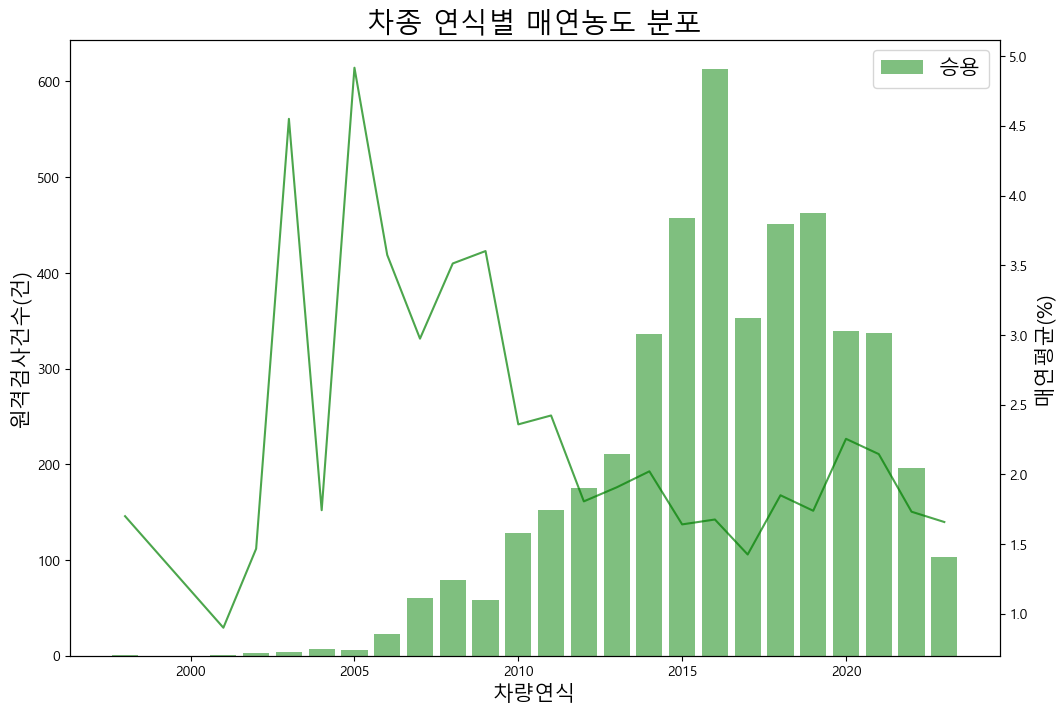

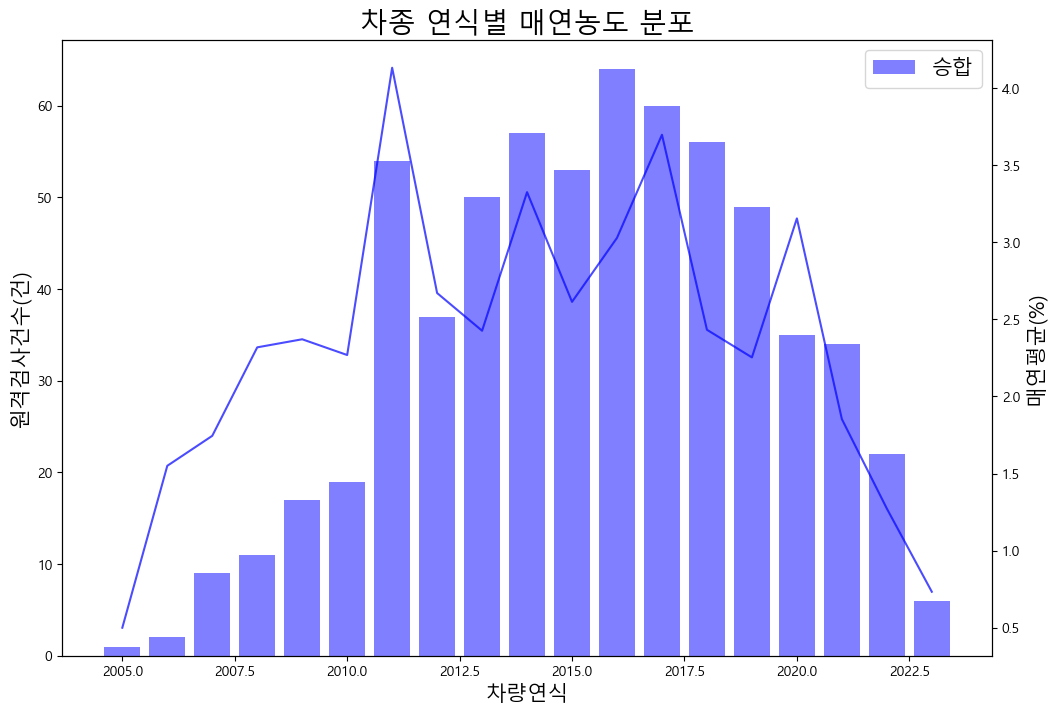

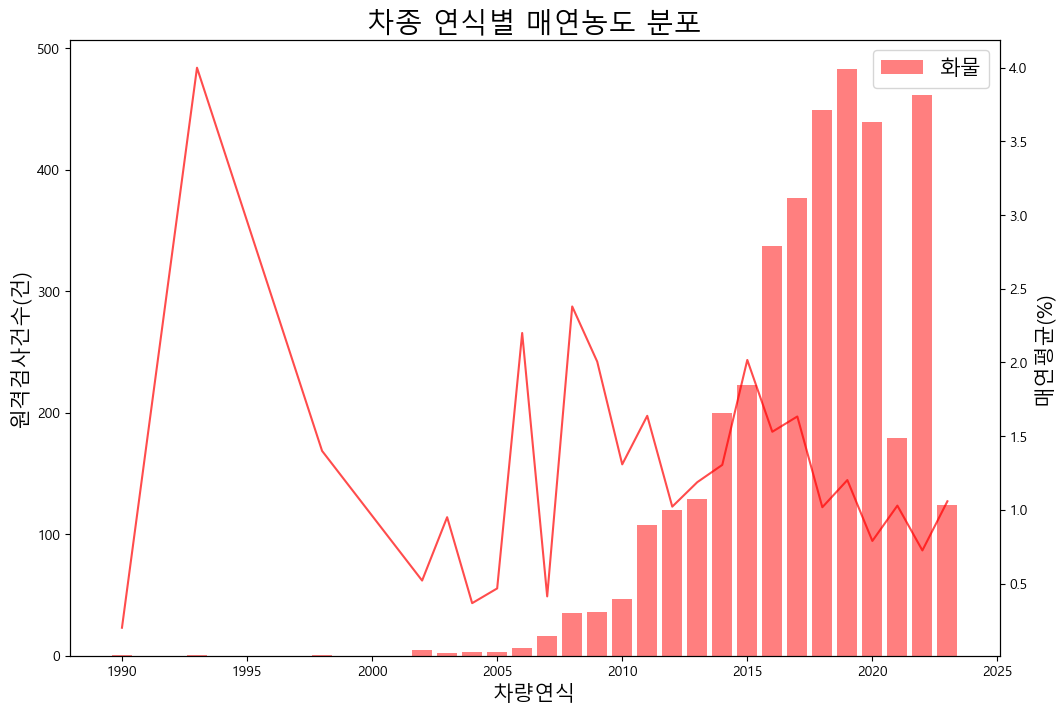

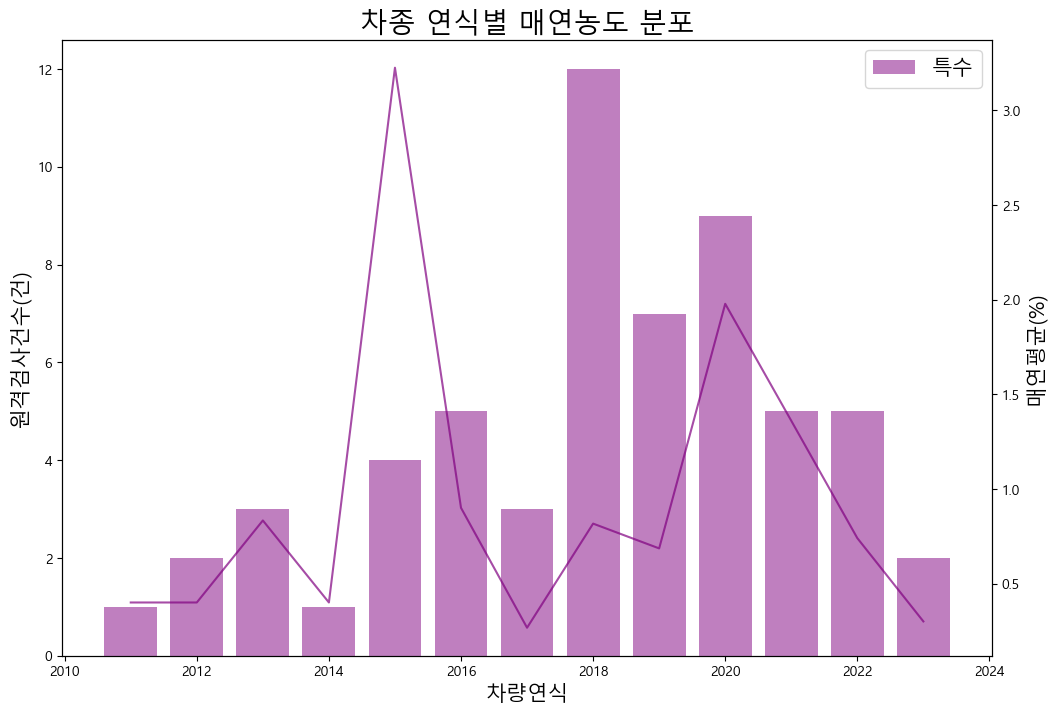

In [112]:
for ty, cr in zip(['승용', '승합', '화물', '특수'], ['g', 'b', 'r', 'purple']):
    temp = grp20[grp20['차종'] == ty]

    fig, ax1 = plt.subplots(figsize=(12, 8))

    ax1.bar(temp['차량연식'], temp['원격검사건수'], color=cr, alpha=0.5, label=ty)

    ax1.legend(fontsize=15)

    ax1.set_title('차종 연식별 매연농도 분포', fontsize=20)
    ax1.set_ylabel('원격검사건수(건)', rotation=90, fontsize=15)
    ax1.set_xlabel('차량연식', fontsize=15)

    ax2 = ax1.twinx()
    ax2.plot(temp['차량연식'], temp['매연평균'], color=cr, alpha=0.7)
    ax2.set_ylabel('매연평균(%)', rotation=90, fontsize=15)
    plt.show();

In [113]:
grp20.sort_values('차량연식')['차량연식'].unique()

array([1990., 1993., 1998., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023.])

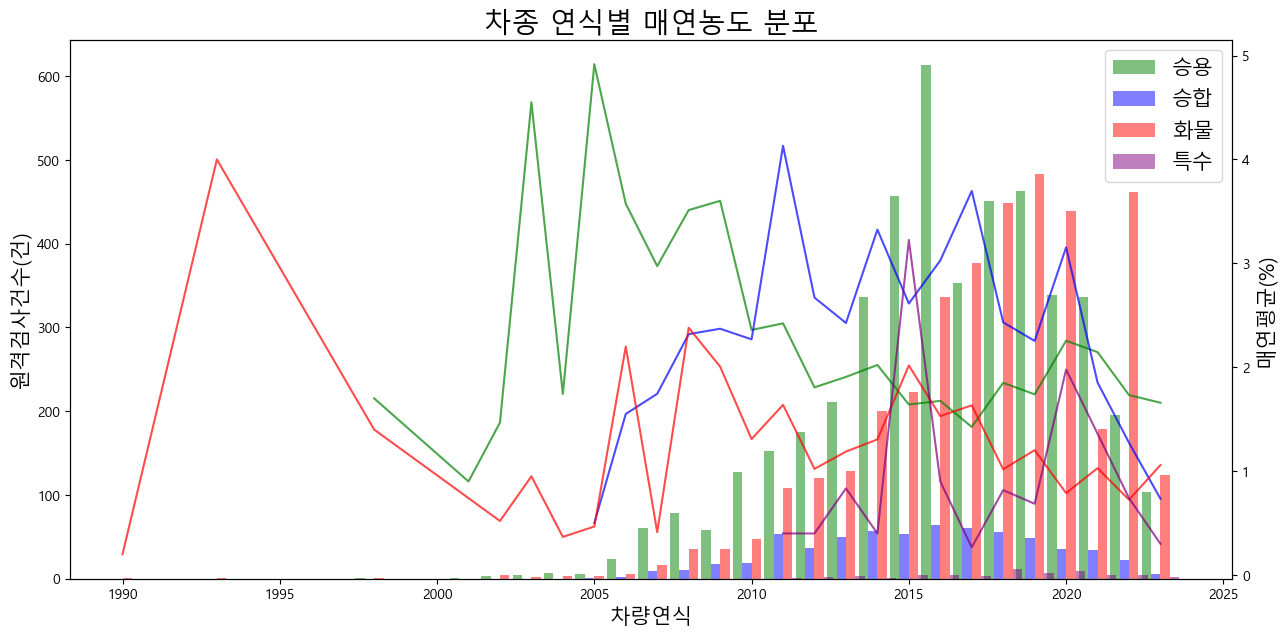

In [114]:
temp1 = grp20[grp20['차종'] == '승용']
temp2 = grp20[grp20['차종'] == '승합']
temp3 = grp20[grp20['차종'] == '화물']
temp4 = grp20[grp20['차종'] == '특수']

fig, ax1 = plt.subplots(figsize=(15, 7))

bar_width = 0.3

index1 = temp1['차량연식'].to_numpy()
index2 = temp2['차량연식'].to_numpy()
index3 = temp3['차량연식'].to_numpy()
index4 = temp4['차량연식'].to_numpy()

ax1.bar(index1 - 0.45, temp1['원격검사건수'], color='g', alpha=0.5, label='승용', width=bar_width)
ax1.bar(index2 - 0.15, temp2['원격검사건수'], color='b', alpha=0.5, label='승합', width=bar_width)
ax1.bar(index3 + 0.15, temp3['원격검사건수'], color='r', alpha=0.5, label='화물', width=bar_width)
ax1.bar(index4 + 0.45, temp4['원격검사건수'], color='purple', alpha=0.5, label='특수', width=bar_width)
ax1.legend(fontsize=15)

ax1.set_title('차종 연식별 매연농도 분포', fontsize=20)
ax1.set_ylabel('원격검사건수(건)', rotation=90, fontsize=15)
ax1.set_xlabel('차량연식', fontsize=15)

ax2 = ax1.twinx()
ax2.plot(index1, temp1['매연평균'], color='g', alpha=0.7)
ax2.plot(index2, temp2['매연평균'], color='b', alpha=0.7)
ax2.plot(index3, temp3['매연평균'], color='r', alpha=0.7)
ax2.plot(index4, temp4['매연평균'], color='purple', alpha=0.7)
ax2.set_ylabel('매연평균(%)', rotation=90, fontsize=15)

plt.show();

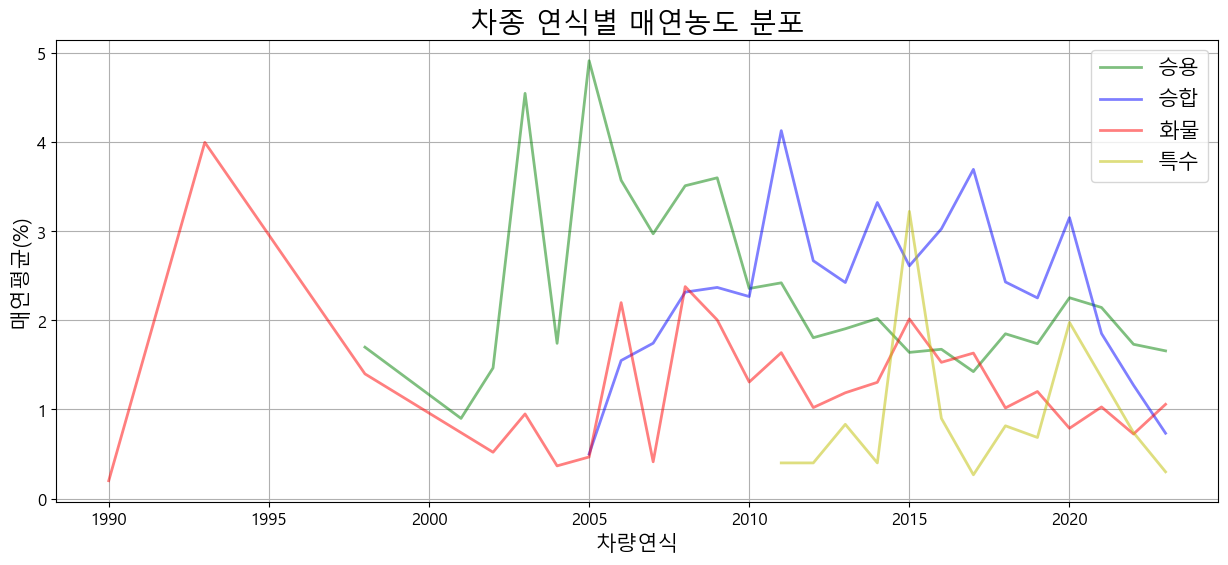

In [115]:
plt.figure(figsize=(15,6))

for ty, cr in zip(['승용', '승합', '화물', '특수'], ['g', 'b', 'r', 'y']):
    temp = grp20[grp20['차종'] == ty]
    index = temp['차량연식'].to_numpy()

    plt.plot(index, temp['매연평균'], color=cr, alpha=0.5, label=ty, linewidth=2)

plt.grid()
plt.title('차종 연식별 매연농도 분포', fontsize=20)
plt.ylabel('매연평균(%)', rotation=90, fontsize=15)
plt.xlabel('차량연식', fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=15)

plt.savefig(os.path.join(img_fold, '다차선분석_20번.png'), bbox_inches='tight')
plt.show();

## 21\. 차종 + 연식 + 배기량별 매연농도 분포
- 차종, 연식, 배기량별 매연 값 평균

In [116]:
grp21 = die.groupby(['차종', '차량연식', '배기량구분'], dropna=False).agg({'매연':'mean', '자동차등록번호':'count'}).reset_index()
grp21 = grp21.rename(columns={'자동차등록번호':'원격검사건수', '매연':'매연평균'})
grp21

,차종,차량연식,배기량구분,매연평균,원격검사건수
0,승용,1998.00,0이상 5000미만,1.70,1
1,승용,2001.00,0이상 5000미만,0.90,1
2,승용,2002.00,0이상 5000미만,1.47,3
3,승용,2003.00,0이상 5000미만,4.55,4
4,승용,2004.00,0이상 5000미만,1.74,7
...,...,...,...,...,...
126,화물,2022.00,0이상 5000미만,0.73,458
127,화물,2022.00,10000이상 15000미만,0.00,1
128,화물,2022.00,5000이상 10000미만,0.40,3
129,화물,2023.00,0이상 5000미만,0.91,115


In [117]:
grp21['원격검사건수'].sum()

9037

## 22\. 엔진형식별 분포
- 엔진형식별 매연 값 평균

In [118]:
grp22 = die.groupby(['엔진형식'], dropna=False).agg({'매연':'mean', '자동차등록번호':'count'}).reset_index()
grp22 = grp22.rename(columns={'자동차등록번호':'원격검사건수', '매연':'매연평균'})
grp22

,엔진형식,매연평균,원격검사건수
0,204DT,2.76,37
1,224DT,2.47,9
2,276DT,0.70,1
3,306D3,1.67,3
4,306DT,0.89,14
...,...,...,...
185,Y,5.30,4
186,YH01,1.23,4
187,Z20D1,1.00,58
188,Z20S,2.39,29


In [119]:
grp22['원격검사건수'].sum()

9037

In [120]:
grp22['매연평균'].max()

10.0

In [121]:
grp22.loc[grp22['매연평균'] == grp22['매연평균'].max(), '엔진형식']

180    T8MA
Name: 엔진형식, dtype: object

In [122]:
die.loc[die['엔진형식'] == 'T8MA', ['자동차등록번호', '제작사명', '차명']]

,자동차등록번호,제작사명,차명
6249,68누6724,포드세일즈서비스코리아(주),Kuga 2.0 AWD
8373,24주0686,포드세일즈서비스코리아(주),Kuga 2.0 AWD


In [123]:
grp22['매연평균'].min()

0.0

In [124]:
grp22.loc[grp22['매연평균'] == grp22['매연평균'].min(), '엔진형식']

113        D6CA
130     DC13155
140        DL08
147    F3BE3681
Name: 엔진형식, dtype: object

In [125]:
die.loc[die['엔진형식'] == 'D6CA', ['자동차등록번호', '제작사명', '차명']]

,자동차등록번호,제작사명,차명
8731,경기86아2053,현대자동차(주),현대슈퍼트럭


In [126]:
die.loc[die['엔진형식'] == 'DC13155', ['자동차등록번호', '제작사명', '차명']]

,자동차등록번호,제작사명,차명
271,전북80사1912,주식회사 전국특장,전국23.8톤상승윙바디


In [127]:
die.loc[die['엔진형식'] == 'DL08', ['자동차등록번호', '제작사명', '차명']]

,자동차등록번호,제작사명,차명
3206,75보6465,자일대우상용차 주식회사,BH090


In [128]:
die.loc[die['엔진형식'] == 'F3BE3681', ['자동차등록번호', '제작사명', '차명']]

,자동차등록번호,제작사명,차명
3258,경기91바9637,타타대우상용차(주),대우25톤카고트럭


## 23\. 차량제작사별 분포
- 제작사명별 매연 값 평균

In [129]:
grp23 = die.groupby(['제작사명'], dropna=False).agg({'매연':'mean', '자동차등록번호':'count'}).reset_index()
grp23 = grp23.rename(columns={'자동차등록번호':'원격검사건수', '매연':'매연평균'})
grp23

,제작사명,매연평균,원격검사건수
0,(유)동양특장차,0.40,1
1,(주) 골드밴,0.40,2
2,(주) 삼오특장자동차,0.50,1
3,(주) 에이엠특장,0.30,1
4,(주) 오텍,0.45,10
...,...,...,...
87,한국쓰리축공업(주),0.60,2
88,한국특장기술(주),0.67,3
89,한불모터스(주),1.20,17
90,한신특장,0.40,3


In [130]:
grp23['원격검사건수'].sum()

9037

In [131]:
grp23.loc[grp23['매연평균'] == grp23['매연평균'].max(), ['제작사명', '매연평균']]

,제작사명,매연평균
72,주식회사 한중특장,16.30


In [132]:
grp23.loc[grp23['매연평균'] == grp23['매연평균'].min(), ['제작사명', '매연평균']]

,제작사명,매연평균
7,(주)다복특장,0.00
26,(주)한국토미,0.00
48,신영특장엠엔씨(주),0.00
49,신정개발특장차 주식회사,0.00
62,정부쓰리축,0.00
67,주식회사 전국특장,0.00


## 결과 출력

In [133]:
today_date = dt.datetime.today().strftime("%Y%m%d")
today_date

'20230830'

In [134]:
with pd.ExcelWriter(os.path.join(an_fold, f'다차선_측정결과_분석({today_date}).xlsx')) as writer:
    grp1.to_excel(writer, sheet_name='1_일자별_측정건수', index=False)
    grp2.to_excel(writer, sheet_name='2_시간대별_측정건수', index=False)
    grp3.to_excel(writer, sheet_name='3_요일별_측정건수', index=False)
    # grp4.to_excel(writer, sheet_name='4_차선별_측정건수', index=False) # 데이터 부재
    grp5.to_excel(writer, sheet_name='5_차종별_측정건수', index=False)
    grp6.to_excel(writer, sheet_name='6_매연측정_통계', index=False)
    # grp7.to_excel(writer, sheet_name='7_차선별_매연측정_통계', index=False) # 데이터 부재
    grp8.to_excel(writer, sheet_name='8_속도별_매연측정_통계', index=False)
    grp9.to_excel(writer, sheet_name='9_매연농도별_측정건수_비율', index=False)
    # grp10.to_excel(writer, sheet_name='10_차선별_매연측정통계', index=False) # 7번과 동일
    # grp11.to_excel(writer, sheet_name='11_속도별_매연측정_통계', index=False) # 8번과 동일
    grp12.to_excel(writer, sheet_name='12_매연농도_상위10%의_정밀검사_결과', index=False) # 사용할 검사 미정
    # grp13.to_excel(writer, sheet_name='13_시험일_후_최초검사_부적합', index=False) # 해당되는 차량 없음
    # grp14.to_excel(writer, sheet_name='14_시험일_후_최종검사_부적합', index=False) # 해당되는 차량 없음
    grp15.to_excel(writer, sheet_name='15_차종별_매연_농도_분포', index=False)
    grp16.to_excel(writer, sheet_name='16_연식별_매연_농도_분포', index=False)
    grp17.to_excel(writer, sheet_name='17_배기량별_매연_농도_분포', index=False)
    grp18.to_excel(writer, sheet_name='18_차량중량별_매연_농도_분포', index=False)
    grp19.to_excel(writer, sheet_name='19_종합검사_매연허용기준별_분포', index=False)
    grp20.to_excel(writer, sheet_name='20_차종_연식별_매연_농도_분포', index=False)
    grp21.to_excel(writer, sheet_name='21_차종_연식_배기량별_매연_농도_분포', index=False)
    grp22.to_excel(writer, sheet_name='22_엔진형식별_분포', index=False)
    grp23.to_excel(writer, sheet_name='23_차량제작사별_분포', index=False)

In [135]:
sec = time.time() - start_time
print(str(dt.timedelta(seconds=sec)).split('.')[0])

0:00:08


# End